**Data Preparation & Coverage Analysis**


In [ ]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews
import random
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('movie_reviews')

# Access the movie reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents
random.shuffle(documents)

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess documents
def preprocess_documents(documents):
    preprocessed = []
    for document, category in documents:
        tokens = word_tokenize(' '.join(document))
        cleaned_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens
                          if token.lower() not in stop_words and token.isalpha()]
        preprocessed.append((cleaned_tokens, category))
    return preprocessed

preprocessed_documents = preprocess_documents(documents)

# Extract unique words before and after preprocessing
original_words = set(word.lower() for document, _ in documents for word in document if word.isalpha())

preprocessed_words = set(word for document, _ in preprocessed_documents for word in document)

# Total number of unique words before and after preprocessing
total_original_words = len(original_words)
print(f"total_original_words:{total_original_words}" )
total_preprocessed_words = len(preprocessed_words)
print(f"total_preprocessed_words:{total_preprocessed_words}")

# Calculate word frequencies in the preprocessed dataset
word_freq = nltk.FreqDist(word for document, _ in preprocessed_documents for word in document)
original_word_freq = nltk.FreqDist(word.lower() for document, _ in documents for word in document if word.isalpha())
print(word_freq)
# Sort words by frequency (most to least common)
sorted_words = sorted(word_freq, key=word_freq.get, reverse=True)
sorted_original_words = sorted(original_word_freq, key=original_word_freq.get, reverse=True)
print(len(sorted_words))

# Calculate the rank of each word and plot the frequency vs. rank on a log-log scale
ranks = range(1, len(sorted_original_words) + 1)
frequencies = [original_word_freq[word] for word in sorted_original_words]

# Plotting the Zipf's law graph
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, label='Word Frequencies')
plt.xlabel('Rank of word (log scale)')
plt.ylabel('Frequency of word (log scale)')
plt.title('Word Frequency Distribution According to Zipf\'s Law')
plt.legend()

# Coverage analysis
coverage = []
for i in range(1, len(sorted_words) + 1):
    coverage_percentage = (len(set(sorted_words[:i]).intersection(original_words)) / total_original_words) * 100
    coverage.append(coverage_percentage)

# Plotting the coverage analysis
plt.figure(figsize=(10, 6))
plt.plot(coverage, label='Coverage')
plt.xlabel('Number of Tokens Considered')
plt.ylabel('Coverage Percentage')
plt.title('Coverage Analysis of Unique Words After Preprocessing')
plt.legend()
plt.show()

**Algorithm Implementation**

Accuracy with TF (Naive Bayes): 0.775
Accuracy with TF-IDF (Naive Bayes): 0.7825
Accuracy with TF (Logistic Regression): 0.84
Accuracy with TF-IDF (Logistic Regression): 0.825
Accuracy with TF (MLP): 0.8425
Accuracy with TF-IDF (MLP): 0.81


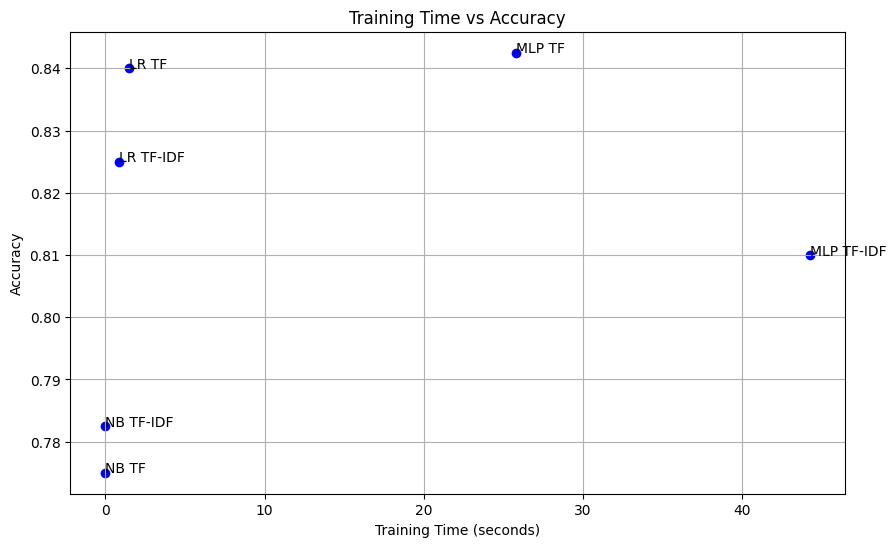

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time



# Prepare the dataset
texts = [' '.join(doc) for doc, _ in preprocessed_documents]
labels = [label for _, label in preprocessed_documents]

# Initialize vectorizers
tf_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Feature extraction with TF
X_tf = tf_vectorizer.fit_transform(texts)

# Feature extraction with TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Train-test split for TF features
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, labels, test_size=0.2)

# Train-test split for TF-IDF features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, labels, test_size=0.2)

accuracies = []
training_times = []
labels = ['NB TF', 'NB TF-IDF', 'LR TF', 'LR TF-IDF', 'MLP TF', 'MLP TF-IDF']

# Define and train Multinomial Naive Bayes with TF
start_time = time.time()
mnb_tf = MultinomialNB()
mnb_tf.fit(X_train_tf, y_train_tf)
training_times.append(time.time() - start_time)
y_pred_tf = mnb_tf.predict(X_test_tf)
accuracies.append(accuracy_score(y_test_tf, y_pred_tf))
print("Accuracy with TF (Naive Bayes):", accuracy_score(y_test_tf, y_pred_tf))

# Define and train Multinomial Naive Bayes with TF-IDF
start_time = time.time()
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train_tfidf)
training_times.append(time.time() - start_time)
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)
accuracies.append(accuracy_score(y_test_tfidf, y_pred_tfidf))
print("Accuracy with TF-IDF (Naive Bayes):", accuracy_score(y_test_tfidf, y_pred_tfidf))

# Define and train Logistic Regression with TF
start_time = time.time()
lrf_tf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
lrf_tf.fit(X_train_tf, y_train_tf)
training_times.append(time.time() - start_time)
y_pred_tf = lrf_tf.predict(X_test_tf)
accuracies.append(accuracy_score(y_test_tf, y_pred_tf))
print("Accuracy with TF (Logistic Regression):", accuracy_score(y_test_tf, y_pred_tf))

# Define and train Logistic Regression with TF-IDF
start_time = time.time()
lrf_tfidf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
lrf_tfidf.fit(X_train_tfidf, y_train_tfidf)
training_times.append(time.time() - start_time)
y_pred_tfidf = lrf_tfidf.predict(X_test_tfidf)
accuracies.append(accuracy_score(y_test_tfidf, y_pred_tfidf))
print("Accuracy with TF-IDF (Logistic Regression):", accuracy_score(y_test_tfidf, y_pred_tfidf))

# Define and train MLP with TF
start_time = time.time()
mlp_tf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
mlp_tf.fit(X_train_tf, y_train_tf)
training_times.append(time.time() - start_time)
y_pred_tf = mlp_tf.predict(X_test_tf)
accuracies.append(accuracy_score(y_test_tf, y_pred_tf))
print("Accuracy with TF (MLP):", accuracy_score(y_test_tf, y_pred_tf))

# Define and train MLP with TF-IDF
start_time = time.time()
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
mlp_tfidf.fit(X_train_tfidf, y_train_tfidf)
training_times.append(time.time() - start_time)
y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf)
accuracies.append(accuracy_score(y_test_tfidf, y_pred_tfidf))
print("Accuracy with TF-IDF (MLP):", accuracy_score(y_test_tfidf, y_pred_tfidf))


# Plotting time vs accuracy
plt.figure(figsize=(10, 6))
plt.scatter(training_times, accuracies, color='blue')
plt.title('Training Time vs Accuracy')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.grid(True)
for i, txt in enumerate(labels):
    plt.annotate(txt, (training_times[i], accuracies[i]))
plt.show()

**Training and Evaluation**

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

def calculate_tpr_fpr(y_true, y_pred):
    # Calculate True Positive Rate and False Positive Rate from confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

# Create a dictionary to store the performance metrics
performance_metrics = {
    'Model': [],
    'Representation': [],
    'Accuracy': [],
    'TPR': [],
    'FPR': []
}

# Helper function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, representation):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    tpr, fpr = calculate_tpr_fpr(y_test, y_pred)
    # Update the dictionary
    performance_metrics['Model'].append(model_name)
    performance_metrics['Representation'].append(representation)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['TPR'].append(tpr)
    performance_metrics['FPR'].append(fpr)

# Evaluate Multinomial Naive Bayes with TF and TF-IDF
evaluate_model(MultinomialNB(), X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'MultinomialNB', 'TF')
evaluate_model(MultinomialNB(), X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, 'MultinomialNB', 'TF-IDF')

# Evaluate Logistic Regression with TF and TF-IDF
evaluate_model(LogisticRegression(max_iter=1000), X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'LogisticRegression', 'TF')
evaluate_model(LogisticRegression(max_iter=1000), X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, 'LogisticRegression', 'TF-IDF')

# Evaluate MLP with TF and TF-IDF
evaluate_model(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300), X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'MLPClassifier', 'TF')
evaluate_model(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300), X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, 'MLPClassifier', 'TF-IDF')

# Print the performance metrics
for i in range(len(performance_metrics['Model'])):
    print(f"{performance_metrics['Model'][i]} with {performance_metrics['Representation'][i]}: "
          f"Accuracy={performance_metrics['Accuracy'][i]:.4f}, "
          f"TPR={performance_metrics['TPR'][i]:.4f}, "
          f"FPR={performance_metrics['FPR'][i]:.4f}")


MultinomialNB with TF: Accuracy=0.7750, TPR=0.7333, FPR=0.1854
MultinomialNB with TF-IDF: Accuracy=0.7825, TPR=0.7330, FPR=0.1649
LogisticRegression with TF: Accuracy=0.8400, TPR=0.7949, FPR=0.1171
LogisticRegression with TF-IDF: Accuracy=0.8250, TPR=0.8301, FPR=0.1804
MLPClassifier with TF: Accuracy=0.8600, TPR=0.8410, FPR=0.1220
MLPClassifier with TF-IDF: Accuracy=0.8050, TPR=0.8010, FPR=0.1907


**Visualization and Analysis**

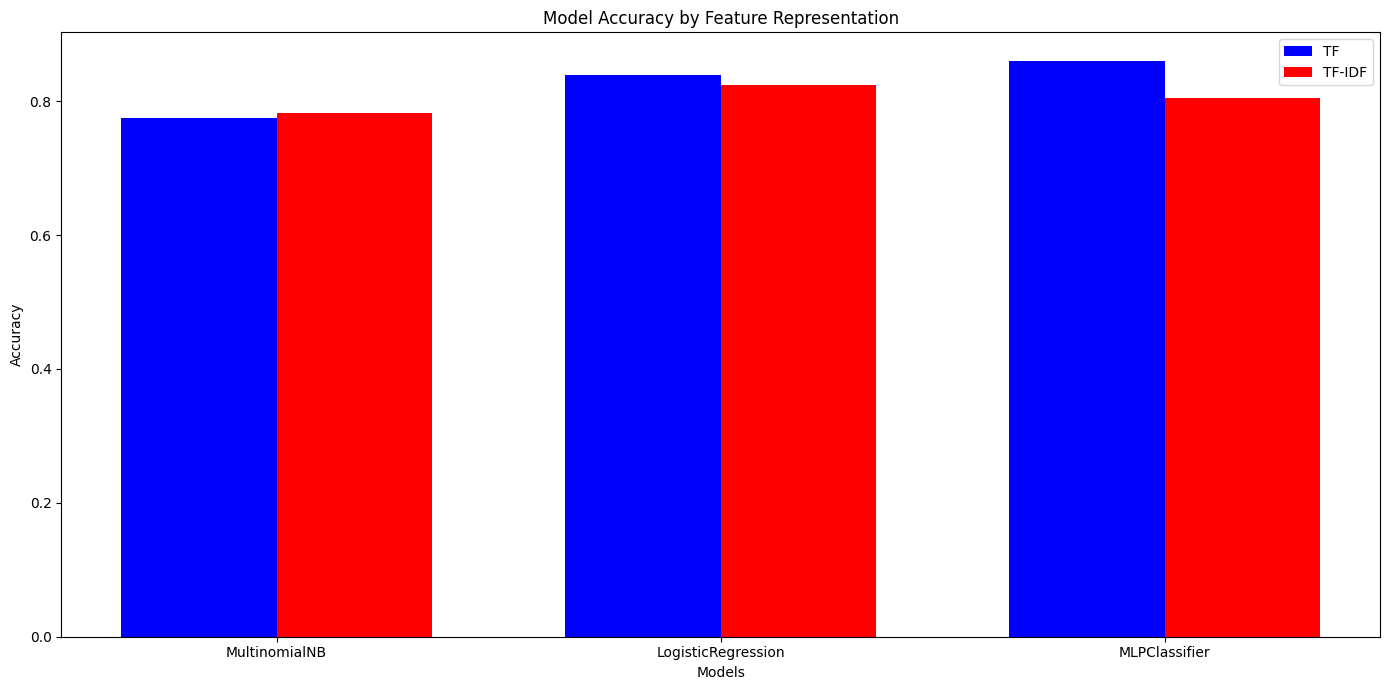

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame(performance_metrics)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot accuracy for each model and representation
accuracy_tf = df[df['Representation'] == 'TF']['Accuracy']
accuracy_tfidf = df[df['Representation'] == 'TF-IDF']['Accuracy']
bar_width = 0.35
index = np.arange(len(accuracy_tf))

bar1 = plt.bar(index, accuracy_tf, bar_width, label='TF', color='b')
bar2 = plt.bar(index + bar_width, accuracy_tfidf, bar_width, label='TF-IDF', color='r')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Feature Representation')
plt.xticks(index + bar_width / 2, df[df['Representation'] == 'TF']['Model'])
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

